## Imports

In [1]:
import os
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, MaxPooling2D, Dense

## Datagen object creation

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
##image aug datagen
datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255., # Rescaling
    rotation_range = 40, # for augmentation
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

##normal datagen
datagen = ImageDataGenerator() # Rescaling

## Loading image with augmentation

In [3]:
image_size = (150, 150)

In [4]:
##augmented datagen
training_set = datagen_aug.flow_from_directory('C:/Users/user/Documents/GitHub/GroceryCV/GroceryStoreDataset-master/dataset/train',
                                          batch_size=64,
                                           target_size = image_size,
                                            shuffle=True,
                                          class_mode='categorical')

Found 1239 images belonging to 3 classes.


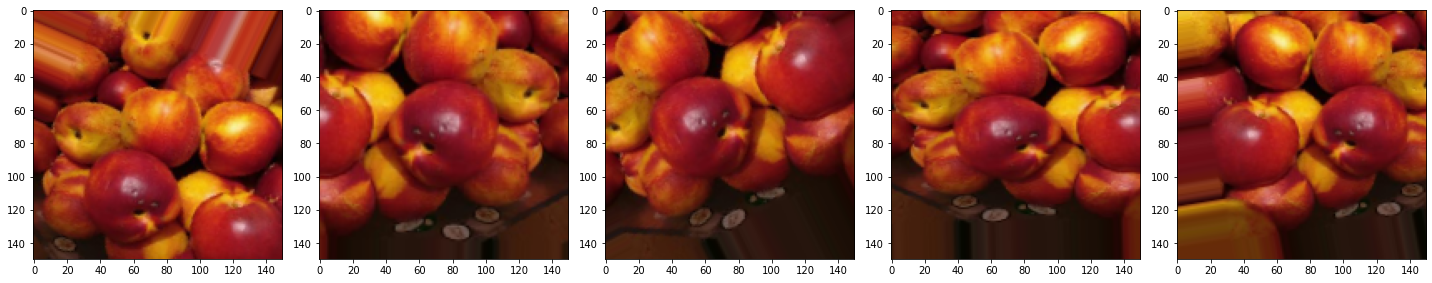

In [5]:
##plot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [training_set[0][0][0] for i in range(10)]
plotImages(augmented_images)

## Load test data

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/user/Documents/GitHub/GroceryCV/GroceryStoreDataset-master/dataset/test',
                                          batch_size=32,
                                        target_size = image_size,
                                          class_mode='categorical')

Found 165 images belonging to 3 classes.


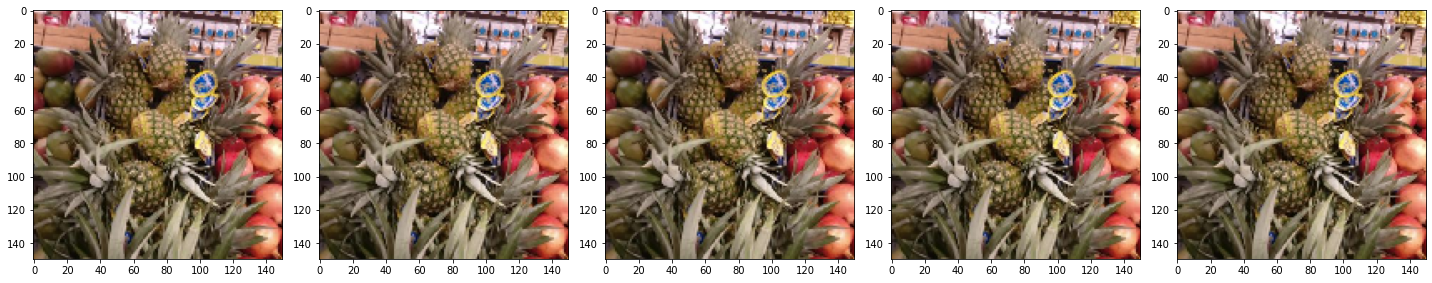

In [7]:
augmented_images = [test_set[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [8]:
labels = (training_set.class_indices)
labels

{'Fruit': 0, 'Packages': 1, 'Vegetables': 2}

In [9]:
len(labels)

3

## Build Model

In [10]:
batch_norm = tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer="zeros",
    gamma_initializer="ones",
    moving_mean_initializer="zeros",
    moving_variance_initializer="ones",
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
)

In [11]:
# Initialising the CNN
# cnn = Sequential()
# cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
# # cnn.add(batch_norm)
# # cnn.add(MaxPooling2D(pool_size=(2, 2)))
# cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# # cnn.add(batch_norm)
# # cnn.add(MaxPooling2D(pool_size=(2, 2)))
# # cnn.add(batch_norm)
# cnn.add(Flatten())
# cnn.add(Dense(64, activation='relu'))
# # cnn.add(batch_norm)
# cnn.add(Flatten())
# cnn.add(Dense(len(labels), activation='softmax'))

cnn = Sequential()
cnn.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
# cnn.add(batch_norm)
cnn.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(16, activation='relu'))
cnn.add(Dense(len(labels), activation='softmax'))

# Display a model summary
cnn.summary()


cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy']
             )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 16)      1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 142, 142, 32)      12832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 138, 138, 64)      51264     
_________________________________________________________________
flatten (Flatten)            (None, 1218816)           0         
_________________________________________________________________
dense (Dense)                (None, 16)                19501072  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 19,566,435
Trainable params: 19,566,435
Non-trainable params: 0
____________________________________________

In [12]:
start = time.time()
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 10)
end = time.time()
print("Time taken:", end - start)

Epoch 1/10
20/20 [==============================] - 28s 895ms/step - loss: 6.1757 - accuracy: 0.4216 - val_loss: 1.0303 - val_accuracy: 0.4424
Epoch 2/10
20/20 [==============================] - 10s 497ms/step - loss: 1.0815 - accuracy: 0.3747 - val_loss: 1.0486 - val_accuracy: 0.4909
Epoch 3/10
20/20 [==============================] - 11s 536ms/step - loss: 1.0419 - accuracy: 0.4572 - val_loss: 0.9867 - val_accuracy: 0.4667
Epoch 4/10
20/20 [==============================] - 11s 539ms/step - loss: 1.0224 - accuracy: 0.4916 - val_loss: 1.0106 - val_accuracy: 0.5394
Epoch 5/10
20/20 [==============================] - 10s 503ms/step - loss: 1.0147 - accuracy: 0.5121 - val_loss: 1.0004 - val_accuracy: 0.4909
Epoch 6/10
20/20 [==============================] - 10s 502ms/step - loss: 1.0111 - accuracy: 0.4942 - val_loss: 1.0001 - val_accuracy: 0.4788
Epoch 7/10
20/20 [==============================] - 10s 502ms/step - loss: 1.0008 - accuracy: 0.5325 - val_loss: 0.9806 - val_accuracy: 0.5030